# Algoritmo Genético - Problema da mochila

O problema da mochila consiste em escolher os itens com maior valor (benefício) que podem ser inseridos em uma mochila sem extrapolar uma condição $ C $ (peso, espaço, etc).

Esse é um problema de otimização em que o objetivo é maximizar o benefício dentro da condição $ C $.

Esse tipo de problema pode ser resolvido por meio de um algoritmo genético.

Os algoritmos genéticos mapeiam o problema para um vetor de bits (há outras formas) em que o bit 1 representa que o item foi selecionado e o bit 0 o item não foi selecionado.

O algoritmo gera uma população inicial aleatória que será mapeada para um vetor de bits. Em seguida é aplicada uma função fitness (heurística) sobre a população, os melhores dessa população serão escolhidos para reprodução (*crossover*), então ocorre  uma mutação (altera o valor de nenhum, um ou mais bits) com base em um fator de probabilidade, então a função fitness é aplicada novamente e os mais aptos são selecionados para a nova geração. O processo se repete até atingir uma condição de parada.

Pode ocorrer de um ou mais indivíduos não pertencerem ao conjunto de soluções do problema, então é aplicada um punição ou correção sobre os indivíduos antes de selecionar a nova geração.

In [1]:
import random

# # peso máximo da mochila
# limite_peso = 120 #C
# tamanho_populacao = 100 #Np
# probabilidade_mutacao = 0.005 # Pm
# probabilidade_crossover = 0.9 #Pc
# maximo_geracoes = 500 

# população inicial do problema
itens_disponiveis = [ 
    { 'peso': 3, 'valor': 1},
    { 'peso': 8, 'valor': 3},
    { 'peso': 12, 'valor': 1},
    { 'peso': 2, 'valor': 8},
    { 'peso': 8, 'valor': 9},
    { 'peso': 4, 'valor': 3},
    { 'peso': 4, 'valor': 2},
    { 'peso': 5, 'valor': 8},
    { 'peso': 1, 'valor': 5},
    { 'peso': 1, 'valor': 1},
    { 'peso': 8, 'valor': 1},
    { 'peso': 6, 'valor': 6},
    { 'peso': 4, 'valor': 3},
    { 'peso': 3, 'valor': 2},
    { 'peso': 3, 'valor': 5},
    { 'peso': 5, 'valor': 2},
    { 'peso': 7, 'valor': 3},
    { 'peso': 3, 'valor': 8},
    { 'peso': 5, 'valor': 9},
    { 'peso': 7, 'valor': 3},
    { 'peso': 4, 'valor': 2},
    { 'peso': 3, 'valor': 4},
    { 'peso': 7, 'valor': 5},
    { 'peso': 2, 'valor': 4},
    { 'peso': 3, 'valor': 3},
    { 'peso': 5, 'valor': 1},
    { 'peso': 4, 'valor': 3},
    { 'peso': 3, 'valor': 2},
    { 'peso': 7, 'valor': 14},
    { 'peso': 19, 'valor': 32},
    { 'peso': 20, 'valor': 20},
    { 'peso': 21, 'valor': 19},
    { 'peso': 11, 'valor': 15},
    { 'peso': 24, 'valor': 37},
    { 'peso': 13, 'valor': 18},
    { 'peso': 17, 'valor': 13},
    { 'peso': 18, 'valor': 19},
    { 'peso': 6, 'valor': 10},
    { 'peso': 15, 'valor': 15},
    { 'peso': 25, 'valor': 40},
    { 'peso': 12, 'valor': 17},
    { 'peso': 19, 'valor': 39},
]


In [2]:
def gerar_populacao_inicial(tamanho_populacao):
    num_max_itens = len(itens_disponiveis)
    
    return [ [random.choice([0,1]) for i in range(num_max_itens)] for j in range(tamanho_populacao)] 


def print_geracao(geracao):
    for g in geracao:
        print('\n')
        for gene in g:
            print('%s ' %(gene), end='', flush=True)
        

# populacao_inicial = gerar_populacao_inicial()

# print('População inicial')
# print_geracao(populacao_inicial)

## Função fitness

É avaliada a heurística da população gerada para futuramente escolher os melhores para reprodução.

In [3]:
# recupera os indices dos valores selecionados para serem inseridos na mochila
def get_index_populacao(populacao):
    return [[index for (index, item) in enumerate(itens_disponiveis) if p[index]] for p in populacao]

# recupera os itens selecionados da população
def get_itens_populacao(populacao):
    return [[item for (index, item) in enumerate(itens_disponiveis) if p[index]] for p in populacao]

# recupera os itens de um unico individuo da população
def get_itens_individuo(individuo):
    return [item for (index, item) in enumerate(itens_disponiveis) if individuo[index]]

# Função fitness para uma população
# Retorna a soma dos pesos e valores de cada item da mochila
def fitness(populacao):
    itens_populacao = get_itens_populacao(populacao)
    
    fitness_values = []
    for index, itens_individuo in enumerate(itens_populacao):
        f =  sum_itens(itens_individuo)
#         if(force_zero and f['peso'] > limite_peso):
#             f['valor'] = 0
            
        f['individuo'] = list(populacao[index]) 
        fitness_values.append( f )
        
    return fitness_values

# Função fitness para um unico indivíduo da população
def fitness_individuo(individuo):
    itens_individuo = get_itens_individuo(individuo)
    
    return sum_itens(itens_individuo)

def fitness_normalizada(populacao):
    fitness_values = fitness(populacao)
    fitness_total = sum_fitness(fitness_values)
    normalizado = []
    
    for individuo in populacao:
        f = fitness_individuo(individuo)
        f_normalizado = {
            'peso': f['peso'] / fitness_total['peso'], 
            'valor': f['valor'] / fitness_total['valor']
        }
        
        normalizado.append(f_normalizado)
        
    return normalizado
    
# Retorna a soma do peso dos indivíduos
def get_peso_individuo(individuo):
    peso = 0
    for item in get_itens_individuo(individuo):
        peso += item['peso']
    return peso

# Soma todos os valores da função fitness apresentados
def sum_fitness(fitness_values):
    return sum_itens(fitness_values)

# soma os pesos e valores dos itens apresentados
def sum_itens(itens):
    soma_peso = 0
    soma_valor = 0
    for item in itens:
        soma_peso += item['peso']
        soma_valor += item['valor']
    
    return {'peso': soma_peso, 'valor': soma_valor}

    
    
# fitness_values = fitness(populacao_inicial)
# print(fitness_values)

# print(fitness_individuo(populacao_inicial[5]))

# print(sum_fitness(fitness_values))

# print(fitness_normalizada(populacao_inicial))

## Seleção - Roleta

Seleção dos indivíduos aptos a se reproduzirem e passarem por crossover. A seleção por roleta calcula o fitness normalizado de cada indivíduo, então seleciona um número aleatório dentro do intervalo \[0,1\] e então soma o fitness normalizado até a soma ser maior ou igual ao número aleatório, o individuo com o fitness correspondente ao final da soma é selecionado para crossover. 

In [4]:
def selecao_roleta(populacao):
    p = fitness_normalizada(populacao)
    
    selecionados = []
    for individuo in populacao:
        p_selecao = random.uniform(0, 1)
        
        index_individuo_selecionado = 0
        soma = p[index_individuo_selecionado]['valor']
        while soma < p_selecao:
            index_individuo_selecionado += 1
            soma += p[index_individuo_selecionado]['valor']
        
        selecionados.append(populacao[index_individuo_selecionado])
    
    return selecionados


# populacao = selecao_roleta(populacao_inicial)
# print_geracao(populacao)    

# Crossover


In [5]:
def crossover(populacao, probabilidade):
    
    populacao_crossover = list(populacao) #copia a população inicial para não deletar
    tamanho_populacao = len(populacao_crossover)
    
    num_individuos_crossover = 0 #numero de individuos que passaram por crossover
    crossovered = [] #população após crossover
    
    while num_individuos_crossover < tamanho_populacao:
        num_individuos_crossover += 2
        
        individuo_1 = select_and_remove(populacao_crossover)
        individuo_2 = select_and_remove(populacao_crossover)
        
        # probabilidade de crossover menor que o limiar
        p_not_crossover = random.uniform(0, 1)
        if probabilidade < p_not_crossover:
            # caso não tenha ocorrido o crossover
            crossovered.append(individuo_1)
            crossovered.append(individuo_2)
            continue
        
        ponto_corte  = random.randrange(len(individuo_1))
        
        filho_1 = list(individuo_1[: ponto_corte ]) + list(individuo_2[ponto_corte : ])
        filho_2 = list(individuo_2[: ponto_corte ]) + list(individuo_1[ponto_corte : ])
        
        crossovered.append(filho_1)
        crossovered.append(filho_2)
    
    return crossovered
        
def select_and_remove(populacao):
    #index_individuo = random.randrange(len(populacao))
    index_individuo = 0 # seleciona sempre os primeiro
    individuo = populacao[index_individuo]
    
    del populacao[index_individuo]
    
    return individuo

# populacao = crossover(populacao)
# print_geracao(populacao)


# Mutação

In [6]:
def mutar(populacao, probabilidade):
    
    for (index, individuo) in enumerate(populacao):
        populacao[index] = mutar_individuo(list(individuo), probabilidade)
    
    return populacao


def mutar_individuo(individuo, probabilidade):
    for (index, gene) in enumerate(individuo):
        p_not_mutar = random.uniform(0, 1)
        #não muta
        if(probabilidade < p_not_mutar):
            continue
        
        if individuo[index] == 1:
            individuo[index] = 0
        else:
            individuo[index] = 1
    
    return individuo

#print_geracao(mutar(populacao))

# Penalização

In [18]:
# retorna a lista com os valores fitness penalizados
# caso o peso ultrapasse o limite o valor fitness é transformado em negativo
# Então todos os valores são deslocados pelo valor mínimo de fintess
# transformando o menor valor negativo em zero
def fitness_ajustado(populacao, limite_peso):
    fitness_minimo = 0
    fitness_penalizada = []
    for index, individuo in enumerate(populacao):
        
        f_individuo = dict(fitness_individuo(individuo))
        #adiciona o indice do individuo para auxiliar a seleção da próxima geração
#         f_individuo['index'] = index 
#         f_individuo['individuo'] = list(individuo) 
        
#         peso = f_individuo['peso']
        
#         f_individuo = sum_itens(get_itens_individuo(individuo))
        f_individuo['individuo'] = list(individuo) 
        peso = f_individuo['peso']

        #peso permitido
        if peso <= limite_peso:
            # conta um cálculo de fintess
            fitness_penalizada.append(f_individuo.copy())
            continue
    
        #transforma o fitenss em negativo
#         f_individuo['valor'] = f_individuo['valor'] * -1
        f_individuo['valor'] = 1.0 / f_individuo['peso']
        
        fitness_penalizada.append(f_individuo.copy())
        
        if f_individuo['valor'] > fitness_minimo:
            fitness_minimo = f_individuo['valor']
        
#         return fitness_penalizada
    return shift_fitness_list(fitness_penalizada, 0)

# Desloca os valores fitness pelo valor informado
def shift_fitness_list(fitness_list, shift):
    for f_individuo in fitness_list:
        f_individuo['valor'] += shift

    return fitness_list
            
#fitness_ajustado(populacao_inicial + populacao)


# Reparação

In [8]:
def reparar(populacao, limite_peso):
    populacao_reparada = []
    for individuo in populacao:
        individuo_corrigido = list(individuo)
        soma = sum_itens(get_itens_individuo(individuo_corrigido))
        
        while soma['peso'] > limite_peso:
            individuo_corrigido = remover_item_individuo(individuo_corrigido)
            soma = sum_itens(get_itens_individuo(individuo_corrigido))
        
        populacao_reparada.append(individuo_corrigido)
    
    return populacao_reparada

def remover_item_individuo(individuo):
    item = 0
    index_item = 0
    while item != 1:
        index_item = random.randrange(len(individuo))
        item = individuo[index_item]
    
    individuo_corrigido = list(individuo)
    individuo_corrigido[index_item] = 0 #remove item
    
    return individuo_corrigido


# Seleção para próxima geração

In [ ]:
def selecionar_nova_populacao(populacao, fitness, tamanho_geracao = tamanho_populacao):
    ''' 
        Seleciona os melhores indivídus sobreviventes para a próxima geração
        @return individuos selecionados e valores fitness
    '''
    fitness_populacao = sorted(fitness, key=lambda k: -k['valor']) 
   
    nova_geracao = []
    i = 0
    while i < tamanho_populacao:
        indice_selecionado = fitness_populacao[i]['index']
        nova_geracao.append(populacao[indice_selecionado])
        
        i += 1
        
    return (nova_geracao, fitness_populacao[:tamanho_populacao])

In [9]:
def selecionar_sobreviventes(fitness_populacao, tamanho_populacao):
    sobreviventes = sorted(fitness_populacao, key=lambda f: f['valor'], reverse=True)
    
    num_sobreviventes = 0
    selecionados = []
    while num_sobreviventes < tamanho_populacao:
        # print(sobreviventes[num_sobreviventes]['valor'])
        selecionados.append(list(sobreviventes[num_sobreviventes]['individuo']))
        num_sobreviventes += 1
    
    return selecionados
    
    
#selecionar_sobreviventes(list(fitness(populacao) + fitness(populacao_reparada)), tamanho_populacao)

# Teste

Plotando
FIM


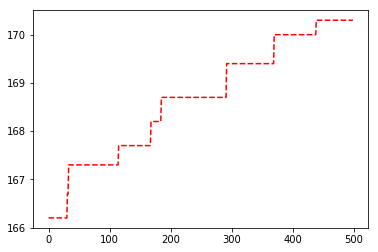

In [34]:
import matplotlib.pyplot as plt

def media_fitness(fitness_list):
    total = sum_itens(fitness_list)
    size = len(fitness_list)
    return {'valor' : float(total['valor'])/size, 'peso': total['peso']/size } 



# peso máximo da mochila
# tamanho_populacao = 10 #Np
# probabilidade_mutacao = 0.005 # Pm
# probabilidade_crossover = 0.9 #Pc
# maximo_geracoes = 50

def teste_penalizacao(tamanho_populacao, maximo_geracoes, probabilidade_mutacao, probabilidade_crossover):
    limite_peso = 120 #C

#     print('População: ', tamanho_populacao)
#     print('Max Gerações: ', maximo_geracoes)
#     print('P. Mutação: ', probabilidade_mutacao)
#     print('P. Crossover: ', probabilidade_crossover)
    
    melhores_individuos = []
    melhores_fitness = []
    fitness_medio = []

    # pais = reparar(gerar_populacao_inicial(tamanho_populacao), tamanho_populacao)

    pais = gerar_populacao_inicial(tamanho_populacao)
    geracao = 0

    while geracao < maximo_geracoes:

#         selecionados_crossover = selecao_roleta(pais)

        selecionados_crusamento = selecao_roleta(pais)

        filhos = crossover(selecionados_crusamento, probabilidade_crossover)
        filhos = mutar(filhos, probabilidade_mutacao)

        populacao_penalizada = fitness_ajustado(pais + filhos, limite_peso)
#         print(list(pais + filhos))
        
        pais = selecionar_sobreviventes(populacao_penalizada, tamanho_populacao)

    #     fitness_melhores = sorted(fitness(pais, force_zero=False), key=lambda f: f['valor'], reverse=True)
        fitness_melhores = sorted(populacao_penalizada, key=lambda f: f['valor'], reverse=True)

#         melhores_individuos.append(list(fitness_melhores[0]['individuo']))
        melhores_fitness.append(fitness_melhores[0])

        #fitness_medio.append(media_fitness(fitness_melhores))

        geracao += 1
        
    return  melhores_fitness


# for m in melhores:
#     print('Peso: %d \t Valor: %d' %(m['peso'], m['valor']))

# tamanho_populacao = 100 #Np
# maximo_geracoes = 100
# probabilidade_crossover = 0.9 #Pc
# probabilidade_mutacao = 0.05 # Pm

limite_peso = 120 #C
tamanho_populacao = 700 #Np
maximo_geracoes = 500
probabilidade_crossover = 0.9 #Pc
probabilidade_mutacao = 0.1 # Pm

execucoes = []
media_melhores = []

file_name = 'saida_pen_pop_' + str(tamanho_populacao) + '_nge_' + str(maximo_geracoes) 
file_name = file_name + '_pcr_' + str(probabilidade_crossover) + '_pmu_' + str(probabilidade_mutacao)
file_name = file_name + '.txt'

f = open(file_name, 'a+')

f.write('Tamanho População (Np): %d \n' %(tamanho_populacao))
f.write('Máximo gerações: %d \n' %(maximo_geracoes))
f.write('P. Crossover (Pc): %f \n' %(probabilidade_crossover))
f.write('P. Mutação (Pm): %f \n' %(probabilidade_mutacao))

melhor_valor = 0
melhor_peso = 0
iteracao_melhor = 0
num_itens_melhor = 0
num_individuos_melhor_valor = 0
itens_melhor = ''
melhor_teste = 0

for i in range(10):
    f.write('\n\n Execução: %d ' %(i+1))
    
    execucao = teste_penalizacao(tamanho_populacao, maximo_geracoes, probabilidade_crossover, probabilidade_mutacao)
    execucoes.append(execucao)
    
    for index, item in enumerate(execucao):
        
        total = sum_itens(get_itens_individuo(item['individuo']))
        total['num_itens'] = sum(item['individuo'])
        itens_mochila = ', '.join(map(str, item['individuo']))
        
        f.write('< %d, %f, %f, %s > \n' %(total['num_itens'], total['peso'], total['valor'], itens_mochila))
        
        if total['valor'] > melhor_valor: 
            melhor_valor = total['valor']
            melhor_peso = total['peso']
            num_itens_melhor = total['num_itens']
            melhor_teste = i 
            num_individuos_melhor_valor = 0
            itens_melhor = itens_mochila
            iteracao_melhor = index
            
        elif total['valor'] == melhor_valor:
            num_individuos_melhor_valor += 1
        
        try:
            soma = media_melhores[index]
        except:
            soma = 0
            media_melhores.append(0)
        
        soma += item['valor']/10 #adiciona na media
        media_melhores[index] = soma

f.write('\nMelhor: \n')
f.write('\nExecução Nº: %d\n'%(melhor_teste) )
f.write('Geracao: %d\n' %(iteracao_melhor))
f.write('Num. Melhores: %d\n' %(num_individuos_melhor_valor))
f.write('< %d, %f, %f, %s > \n' %(num_itens_melhor, melhor_peso, melhor_valor, itens_melhor))
    
    
f.close()

print('Plotando')
valores_penalizados = []
indices = []
for index, m in enumerate(media_melhores):

    valores_penalizados.append(m)
    indices.append(index)

plt.plot(indices, valores_penalizados, 'r--')


print('FIM')



# Teste reparação

In [ ]:
### Teste Reparação ###


# peso máximo da mochila
limite_peso = 120 #C
tamanho_populacao = 100 #Np
probabilidade_mutacao = 0.1 # Pm
probabilidade_crossover = 0.9 #Pc
maximo_geracoes = 100

pais = gerar_populacao_inicial(tamanho_populacao)
#print_geracao(pais)
geracao = 0

melhores = []
while geracao < maximo_geracoes:
    
    selecionados_crusamento = selecao_roleta(pais)
    
    filhos = crossover(selecionados_crusamento, probabilidade_crossover)
    filhos = mutar(filhos, probabilidade_mutacao)
    
    pais_reparados = reparar(pais, limite_peso)
    filhos = reparar(filhos, limite_peso)
    
    fitness_populacao = list(fitness(pais_reparados) + fitness(filhos))
    pais = selecionar_sobreviventes(fitness_populacao, tamanho_populacao)
        
    fitness_melhores = sorted(fitness(pais), key=lambda f: f['valor'], reverse=True)
    
    melhores.append(fitness_melhores[0])
    #print('GERAÇão')
    
    geracao += 1
    
print('\n\n\n')
#print( melhores )


import matplotlib.pyplot as plt

valores = []
indices = []
for index, m in enumerate(melhores):
    valores.append(m['valor'])
    indices.append(index)
 
# print(valores)
plt.plot(indices, valores, 'r--')



In [ ]:
import matplotlib.pyplot as plt

def plot(melhores, media):
    melhores_valores = [item['valor'] for item in melhores]
    valores_medios = [item['valor'] for item in media]
    
    geracoes = [i for i in range(len(melhores_valores))]
    
    plt.plot(
        geracoes, melhores_valores, 'r--', 
        geracoes, valores_medios, 'b--',
    )
    plt.show()

In [ ]:
plot(melhores_fitness, fitness_medio)

# Testes com configurações diferentes

In [ ]:

# peso máximo da mochila
limite_peso = 120 #C
tamanho_populacao = 10 #Np
probabilidade_mutacao = 0.005 # Pm
probabilidade_crossover = 0.9 #Pc
maximo_geracoes = 50

melhores_individuos = []
melhores_fitness = []
fitness_medio = []

# pais = reparar(gerar_populacao_inicial(tamanho_populacao), tamanho_populacao)

pais = gerar_populacao_inicial(tamanho_populacao)
geracao = 0

while geracao < maximo_geracoes:
    
    selecionados_crossover = selecao_roleta(pais)
    
    selecionados_crusamento = selecao_roleta(pais)
    
    filhos = crossover(selecionados_crusamento, probabilidade_crossover)
    filhos = mutar(filhos, probabilidade_mutacao)
    
    populacao_penalizada = fitness_ajustado(list(pais + filhos), limite_peso)
    
    pais = selecionar_sobreviventes(populacao_penalizada, tamanho_populacao)
        
#     fitness_melhores = sorted(fitness(pais, force_zero=False), key=lambda f: f['valor'], reverse=True)
    fitness_melhores = sorted(populacao_penalizada, key=lambda f: f['valor'], reverse=True)
    
    melhores_individuos.append(list(fitness_melhores[0]['individuo']))
    melhores_fitness.append(fitness_melhores[0])
    
    fitness_medio.append(media_fitness(fitness_melhores))
    
    geracao += 1

# for m in melhores:
#     print('Peso: %d \t Valor: %d' %(m['peso'], m['valor']))


import matplotlib.pyplot as plt

valores = []
indices = []
for index, m in enumerate(melhores_fitness):
    valores.append(m['valor'])
    indices.append(index)

plt.plot(indices, valores, 'r--')

#print(melhores)
    
# print_geracao(melhores_fitness)
# print(melhores_fitness)
# print(fitness_medio)
print('FIM')

In [ ]:
import matplotlib.pyplot as plt

# peso máximo da mochila
# limite_peso = 120 #C
# tamanho_populacao = 100 #Np
# probabilidade_mutacao = 0.1 # Pm
# probabilidade_crossover = 0.9 #Pc
# maximo_geracoes = 100

def teste_reparacao(tamanho_populacao, maximo_geracoes, probabilidade_crossover, probabilidade_mutacao):
    limite_peso = 120 #C

    pais = gerar_populacao_inicial(tamanho_populacao)
    #print_geracao(pais)
    geracao = 0

    melhores_fitness = []
    melhores_individuos = []
    while geracao < maximo_geracoes:

        selecionados_crusamento = selecao_roleta(pais)

        filhos = crossover(selecionados_crusamento, probabilidade_crossover)
        filhos = mutar(filhos, probabilidade_mutacao)

        pais_reparados = reparar(pais, limite_peso)
        filhos = reparar(filhos, limite_peso)

        fitness_populacao = list(fitness(pais_reparados) + fitness(filhos))
        pais = selecionar_sobreviventes(fitness_populacao, tamanho_populacao)

        fitness_melhores = sorted(fitness(pais), key=lambda f: f['valor'], reverse=True)

        melhores_fitness.append(fitness_melhores[0])
#         melhores_individuos.append(fitness_melhores[0]['individuo'])
        
        #print('GERAÇão')

        geracao += 1
        
    return melhores_fitness
    
limite_peso = 120 #C
tamanho_populacao = 700 #Np
maximo_geracoes = 500
probabilidade_crossover = 0.9 #Pc
probabilidade_mutacao = 0.1 # Pm

execucoes = []
media_melhores = []


melhor_valor = 0
melhor_peso = 0
iteracao_melhor = 0
num_itens_melhor = 0
num_individuos_melhor_valor = 0
itens_melhor = ''
melhor_teste = 0

file_name = 'saida_rep_pop_' + str(tamanho_populacao) + '_nge_' + str(maximo_geracoes) 
file_name = file_name + '_pcr_' + str(probabilidade_crossover) + '_pmu_' + str(probabilidade_mutacao)

f = open(file_name, 'a+')

f.write('Tamanho População (Np): %d \n' %(tamanho_populacao))
f.write('Máximo gerações: %d \n' %(maximo_geracoes))
f.write('P. Crossover (Pc): %f \n' %(probabilidade_crossover))
f.write('P. Mutação (Pm): %f \n' %(probabilidade_mutacao))


for i in range(10):
    f.write('\n\n Execução: %d ' %(i+1))
    
    execucao = teste_reparacao(tamanho_populacao, maximo_geracoes, probabilidade_crossover, probabilidade_mutacao)
    execucoes.append(execucao)
    
    for index, item in enumerate(execucao):
#         print(item['individuo'])
#         print(sum(item['individuo']))

#         print(itens_mochila)
        
        total = sum_itens(get_itens_individuo(item['individuo']))
        total['num_itens'] = sum(item['individuo'])
        itens_mochila = ', '.join(map(str, item['individuo']))
        
        f.write('< %d, %f, %f, %s > \n' %(total['num_itens'], total['peso'], total['valor'], itens_mochila))
        
        #armazena os dados da melhor geração
        if total['valor'] > melhor_valor: 
            melhor_valor = total['valor']
            melhor_peso = total['peso']
            num_itens_melhor = total['num_itens']
            melhor_teste = i 
            num_individuos_melhor_valor = 0
            itens_melhor = itens_mochila
            iteracao_melhor = index
            
        elif total['valor'] == melhor_valor:
            num_individuos_melhor_valor += 1
            
            
        try:
            soma = media_melhores[index]
        except:
            soma = 0
            media_melhores.append(0)
        
        soma += item['valor']/10 #adiciona na media
        media_melhores[index] = soma
        

f.write('\nMelhor: \n')
f.write('\nExecução Nº: %d\n'%(melhor_teste) )
f.write('Geracao: %d\n' %(iteracao_melhor))
f.write('Num. Melhores: %d\n' %(num_individuos_melhor_valor))
f.write('< %d, %f, %f, %s > \n' %(num_itens_melhor, melhor_peso, melhor_valor, itens_melhor))
    
f.close()

print('Plotando') 

valores_reparados = []
indices = []
for index, m in enumerate(media_melhores):

    valores_reparados.append(m)
    indices.append(index)

# print(valores)
plt.plot(indices, valores_reparados, 'b--')

print('FIM')

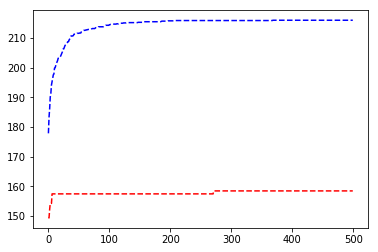

In [33]:
plt.plot(indices, valores_penalizados, 'r--', indices, valores_reparados, 'b--')
